# CS503– Data Visualization Winter 2024 – Project

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import umap

from sklearn.preprocessing import MinMaxScaler
from google.colab import files

## 1

In [91]:
diabetes_df=pd.read_csv('diabetes2.csv')
diabetes_df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## 2.a

In [92]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(diabetes_df)
scaled_data

array([[0.66666667, 1.        , 0.58264463, ..., 0.562217  , 0.43939394,
        0.39252336],
       [0.48333333, 0.        , 0.14876033, ..., 0.22243673, 0.16666667,
        0.15576324],
       [0.88333333, 1.        , 0.51652893, ..., 0.49657763, 0.40909091,
        0.36137072],
       ...,
       [0.68333333, 1.        , 0.28512397, ..., 0.30503001, 0.56060606,
        0.33333333],
       [0.28333333, 0.        , 0.49586777, ..., 0.65702552, 0.40909091,
        0.60747664],
       [0.28333333, 0.        , 0.0661157 , ..., 0.46930394, 0.51515152,
        0.09968847]])

## 2.b

In [93]:
diabetes_df_s = pd.DataFrame(scaled_data, columns=diabetes_df.columns)
diabetes_df_s

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
...,...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605672,0.530303,0.476636
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415810,0.666667,0.246106
439,0.683333,1.0,0.285124,0.530563,0.318627,0.323705,0.272727,0.249647,0.305030,0.560606,0.333333
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657026,0.409091,0.607477


## 3

In [94]:
variances = diabetes_df_s.var()

variances_df = variances.reset_index()
variances_df.columns = ['Variable', 'Variance']

variances_df.to_csv('variance.csv', index=False)

files.download('variance.csv')
variances

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AGE    0.047735
SEX    0.249561
BMI    0.033331
BP     0.037950
S1     0.028780
S2     0.022940
S3     0.028216
S4     0.033128
S5     0.033623
S6     0.030341
Y      0.057679
dtype: float64

## 4

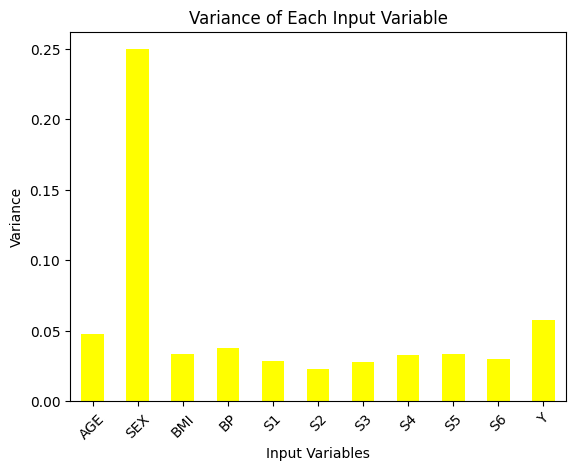

In [95]:


variances.plot(kind='bar',color='yellow')
plt.title('Variance of Each Input Variable')
plt.ylabel('Variance')
plt.xlabel('Input Variables')
plt.xticks(rotation=45)
plt.show()


## 5

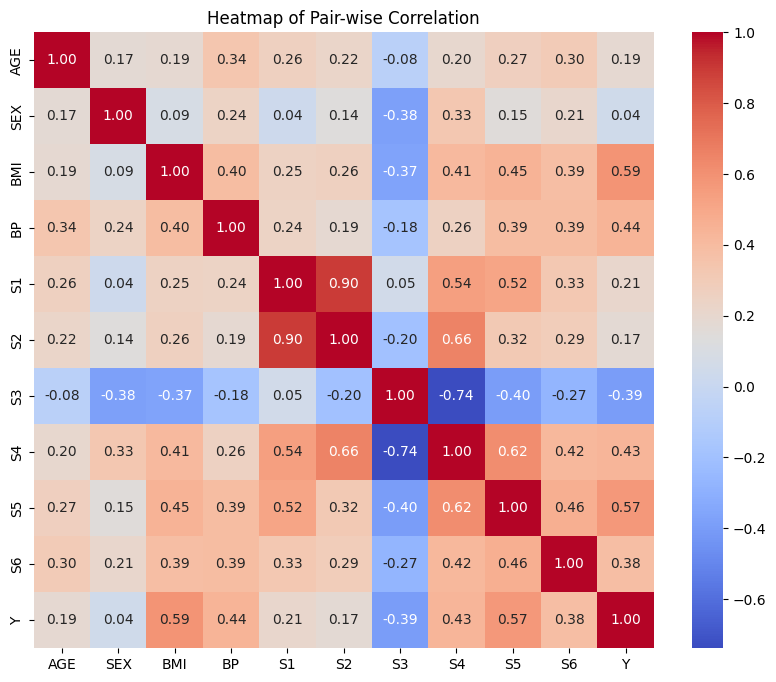

In [96]:
correlation_matrix = diabetes_df_s.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pair-wise Correlation')
plt.show()


## 6

In [97]:
correlation_with_output = correlation_matrix['Y'].sort_values(ascending=False)

correlation_with_output = correlation_with_output.drop(index='Y')
correlation_with_output


BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64

## 7

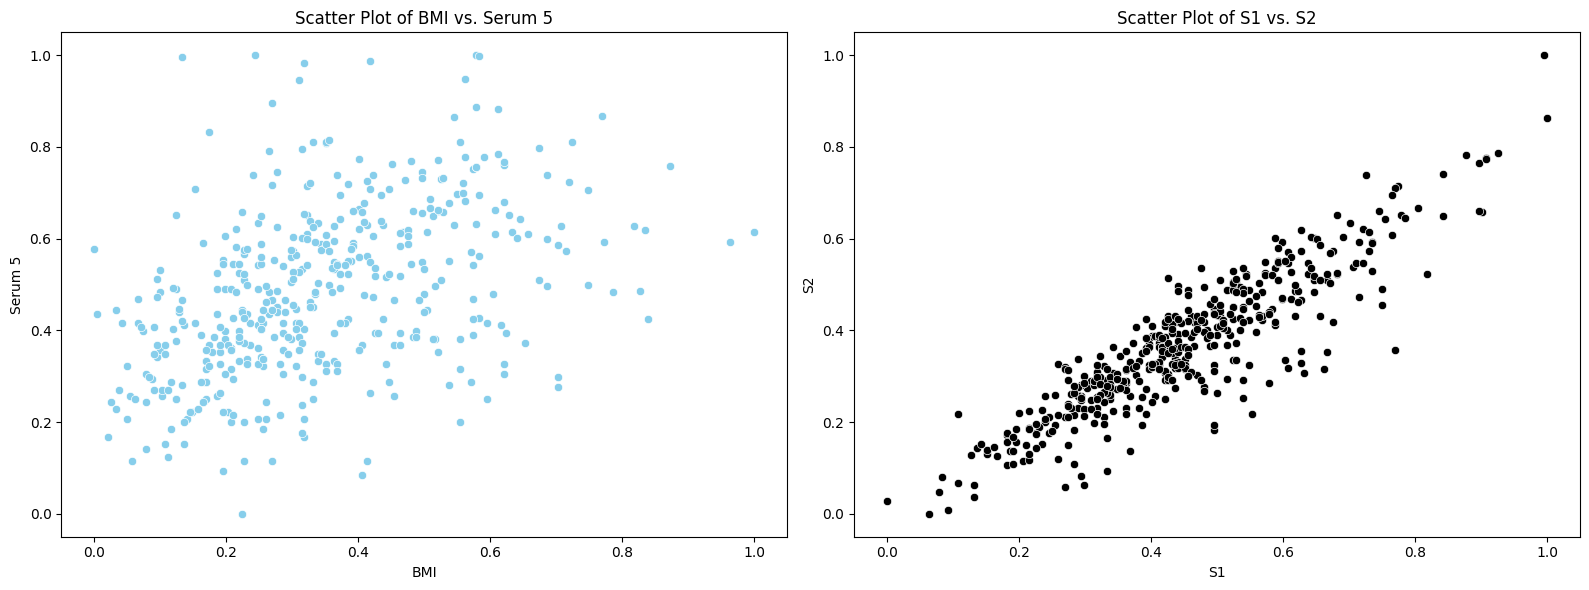

In [98]:
plt.figure(figsize=(16, 6))
# Scatterplot for BMI vs. S5
plt.subplot(1, 2, 1)
sns.scatterplot(data=diabetes_df_s, x='BMI', y='S5', color='skyblue')
plt.title('Scatter Plot of BMI vs. Serum 5')
plt.xlabel('BMI')
plt.ylabel('Serum 5')

# Scatterplot for S1 vs. S2
plt.subplot(1, 2, 2)
sns.scatterplot(data=diabetes_df_s, x='S1', y='S2', color='black')
plt.title('Scatter Plot of S1 vs. S2')
plt.xlabel('S1')
plt.ylabel('S2')

plt.tight_layout()
plt.show()


## 8

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X = diabetes_df_s.drop('Y', axis=1)
y = diabetes_df_s['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_alpha = 0.001

lasso_model = Lasso(alpha=selected_alpha, max_iter=10000, random_state=42)

lasso_model.fit(X_train, y_train)

lasso_coefficients = lasso_model.coef_

selected_variables = X.columns[lasso_coefficients != 0]

selected_variables_with_coefficients = list(zip(selected_variables, lasso_coefficients[lasso_coefficients != 0]))
selected_variables_with_coefficients

[('AGE', 0.0024775726290584706),
 ('SEX', -0.057107749170595336),
 ('BMI', 0.44573621254865964),
 ('BP', 0.24156349441972388),
 ('S1', -0.08034153383553873),
 ('S3', -0.21476856682138565),
 ('S5', 0.3672659178682056),
 ('S6', 0.028519580481934013)]

## 8.b and 8.c:   

In [100]:
from sklearn.metrics import mean_squared_error

X = diabetes_df_s.drop('Y', axis=1)
y = diabetes_df_s['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha_values = [0.0001,0.001,0.01,0.1, 1, 10, 100, 500, 1000]

# Dictionary to store MSEs for each alpha
mse_for_alphas = {}

# Loop over alpha values to train and evaluate Lasso models

coefficients_list = []  # List to hold all coefficients for each alpha
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso_model.fit(X_train, y_train)
    coefficients_list.append(lasso_model.coef_)  # Append the coefficients to the list
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_for_alphas[alpha] = mse

for alpha, mse in mse_for_alphas.items():
    print(f"Alpha: {alpha}, MSE: {mse}")


Alpha: 0.0001, MSE: 0.027972184427189902
Alpha: 0.001, MSE: 0.02710575369479557
Alpha: 0.01, MSE: 0.031204186733114227
Alpha: 0.1, MSE: 0.05203301071649645
Alpha: 1, MSE: 0.05203301071649645
Alpha: 10, MSE: 0.05203301071649645
Alpha: 100, MSE: 0.05203301071649645
Alpha: 500, MSE: 0.05203301071649645
Alpha: 1000, MSE: 0.05203301071649645


## 8.d. 

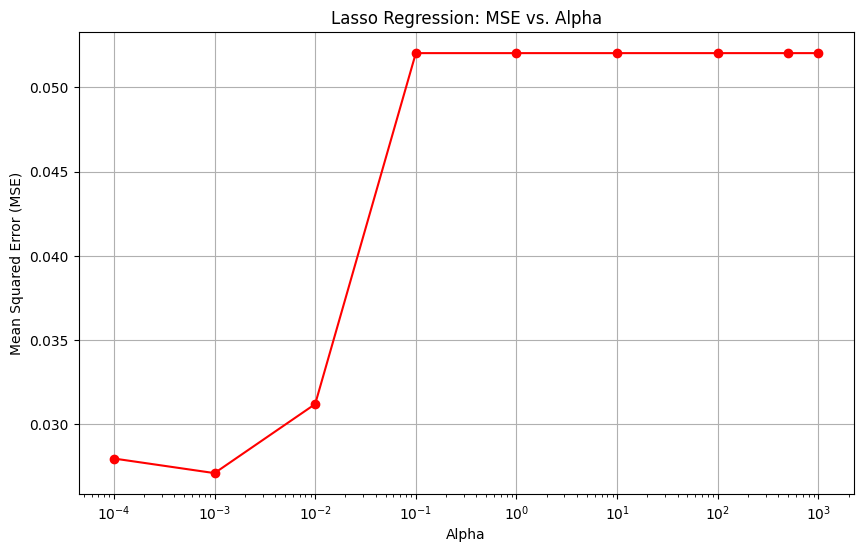

In [101]:
# Convert the MSE and alpha values into a DataFrame
mse_df = pd.DataFrame(list(mse_for_alphas.items()), columns=['Alpha', 'MSE'])
mse_df = mse_df.sort_values(by='Alpha')

plt.figure(figsize=(10, 6))
plt.plot(mse_df['Alpha'], mse_df['MSE'], marker='o', linestyle='-', color='red')
plt.title('Lasso Regression: MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')  # Applying logarithmic scale to alpha for better visualization
plt.grid(True)
plt.show()

## 8.e 

In [102]:
mse_df_sorted = mse_df.sort_values(by='MSE')
best_mse_row = mse_df_sorted.iloc[0]
best_alpha = best_mse_row['Alpha']
best_mse = best_mse_row['MSE']

print(f"The best MSE is {best_mse} with alpha = {best_alpha}")


The best MSE is 0.02710575369479557 with alpha = 0.001


## 8.f


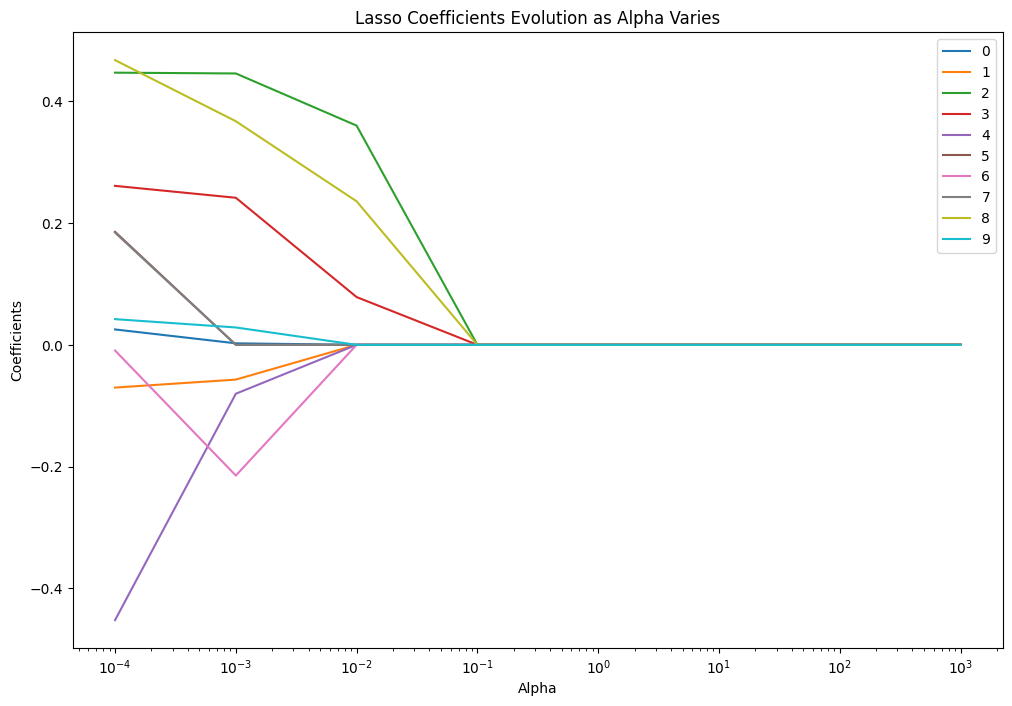

In [103]:
coefficients_df = pd.DataFrame(coefficients_list, index=alpha_values).T

plt.figure(figsize=(12, 8))
for index, row in coefficients_df.iterrows():
    plt.plot(alpha_values, row, label=index)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients Evolution as Alpha Varies')
plt.legend(loc='best')
plt.show()


#9. PCA

## 9.a

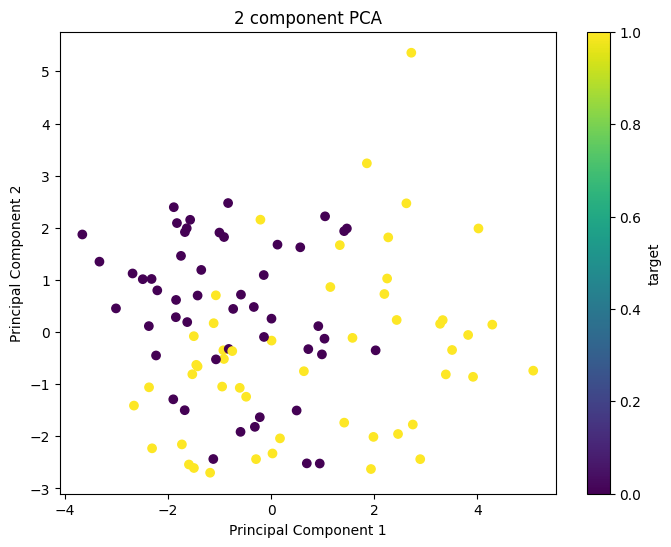

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=42)
diabetes_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 11)])
diabetes_df['target'] = y

features = diabetes_df.drop('target', axis=1)
target = diabetes_df['target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['target'] = target

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.colorbar(label='target')
plt.show()


## 9.b

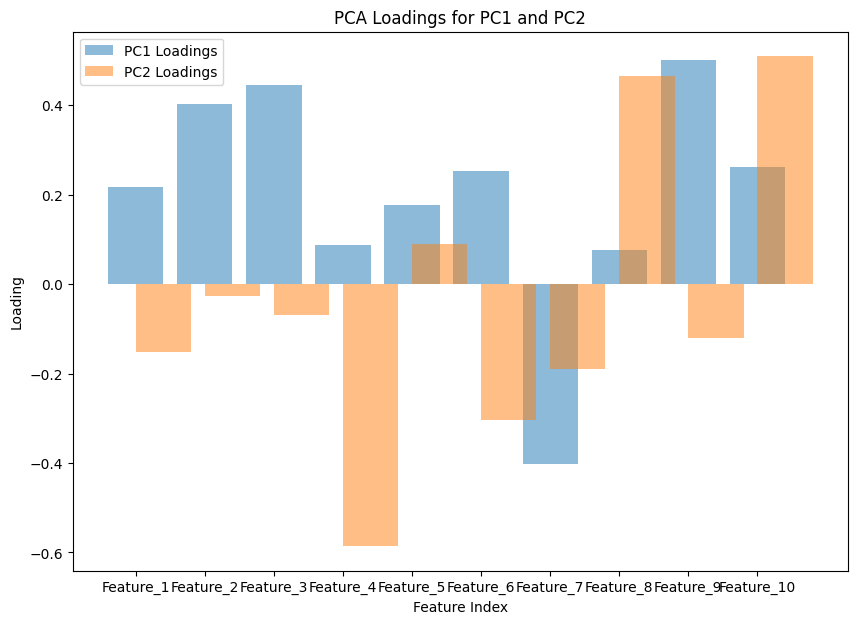

In [105]:
loadings = pca.components_.T
num_features = features_scaled.shape[1]
plt.figure(figsize=(10, 7))
plt.bar(range(num_features), loadings[:, 0], alpha=0.5, align='center', label='PC1 Loadings')
plt.bar(range(num_features), loadings[:, 1], alpha=0.5, align='edge', label='PC2 Loadings')
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.xticks(range(num_features), [f'Feature_{i}' for i in range(1, 11)])
plt.title('PCA Loadings for PC1 and PC2')
plt.legend()
plt.show()


## 9.c and 9.d

Mean Squared Error PC1: 3581.898152283192


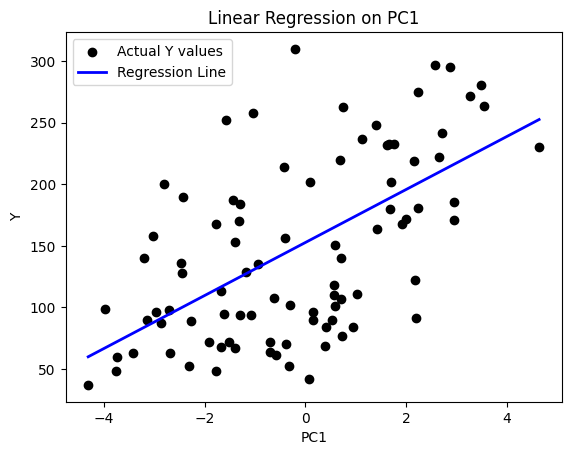

In [150]:
from sklearn.linear_model import LinearRegression


data = pd.read_csv('diabetes2.csv')
X = data.drop('Y', axis=1)
y = data['Y']

X_scaled = scaler.fit_transform(X)

PCA1 = PCA(n_components=1)
X_PCA1 = PCA1.fit_transform(X_scaled)

X_train_PCA1, X_test_PCA1, y_train_PCA1, y_test_PCA1 = train_test_split(X_PCA1, y, test_size=0.2, random_state=42)

model_PCA1= LinearRegression()
model_PCA1.fit(X_train_PCA1, y_train_PCA1)

y_pred_PCA1 = model_PCA1.predict(X_test_PCA1)

mse_pc1 = mean_squared_error(y_test_PCA1, y_pred_PCA1)


print(f'Mean Squared Error PC1: {mse_pc1}')


plt.scatter(X_test_PCA1, y_test_PCA1, color='black', label='Actual Y values')
# The regression line
X_range_PCA1 = np.linspace(X_test_PCA1.min(), X_test_PCA1.max(), 100).reshape(-1, 1)
y_range_pred_PCA1 = model.predict(X_range_PCA1)
plt.plot(X_range_PCA1, y_range_pred_PCA1, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('PC1')
plt.ylabel('Y')
plt.title('Linear Regression on PC1')
plt.legend()
plt.show()


## 9.e and 9.f

Mean Squared Error PC2: 3534.2364099321567


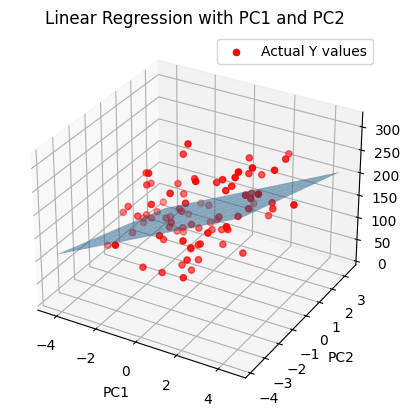

In [152]:
from mpl_toolkits.mplot3d import Axes3D


PCA2 = PCA(n_components=2)
X_PCA2 = PCA2.fit_transform(X_scaled)

X_train_PCA2, X_test_PCA2, y_train_PCA2, y_test_PCA2 = train_test_split(X_PCA2, y, test_size=0.2, random_state=42)

model_PCA2= LinearRegression()
model_PCA2.fit(X_train_PCA2, y_train_PCA2)

y_pred_PCA2 = model_PCA2.predict(X_test_PCA2)

mse_pc2 = mean_squared_error(y_test_PCA2, y_pred_PCA2)

print(f'Mean Squared Error PC2: {mse_pc2}')
# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual test values
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='r', label='Actual Y values')

# Meshgrid for the hyper-plane
x_range_PCA2 = np.linspace(X_test_PCA2[:, 0].min(), X_test_PCA2[:, 0].max(), 10)
y_range_PCA2 = np.linspace(X_test_PCA2[:, 1].min(), X_test_PCA2[:, 1].max(), 10)
x_mesh_PCA2, y_mesh_PCA2 = np.meshgrid(x_range_PCA2, y_range_PCA2)
z_mesh_PCA2 = model2.intercept_ + model2.coef_[0] * x_mesh_PCA2 + model2.coef_[1] * y_mesh_PCA2

# Plotting the hyper-plane
ax.plot_surface(x_mesh_PCA2, y_mesh_PCA2, z_mesh_PCA2, alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Y')
ax.set_title('Linear Regression with PC1 and PC2')
plt.legend()
plt.show()


# 9.g

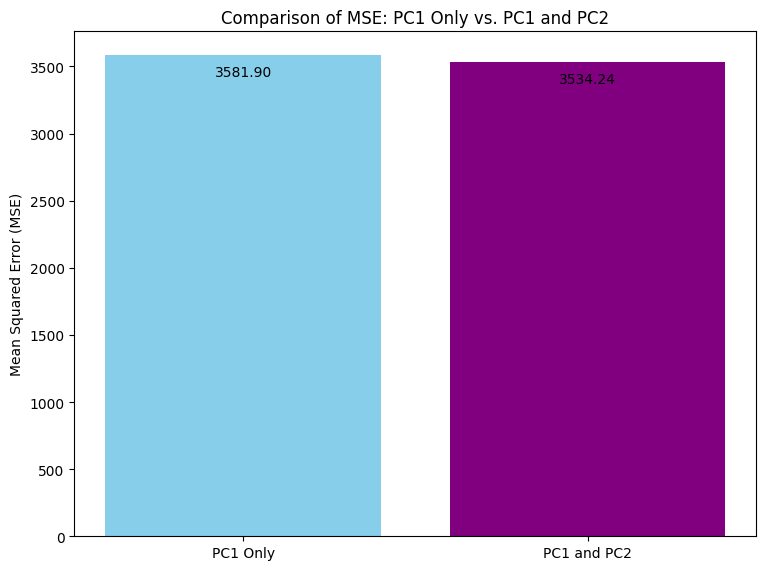

In [119]:
bars = plt.bar(['PC1 Only', 'PC1 and PC2'], [mse_pc1, mse_pc1_pc2], color=['skyblue', 'purple'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE: PC1 Only vs. PC1 and PC2')

for bar, mse in zip(bars, [mse_pc1, mse_pc1_pc2]):
    y_pos = bar.get_height() - 0.05 * bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos, f'{mse:.2f}', ha='center', va='bottom')

plt.tight_layout()


plt.gcf().set_size_inches(8, 6)

plt.show()



## 10.a 


<ipython-input-120-60f09008e296>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


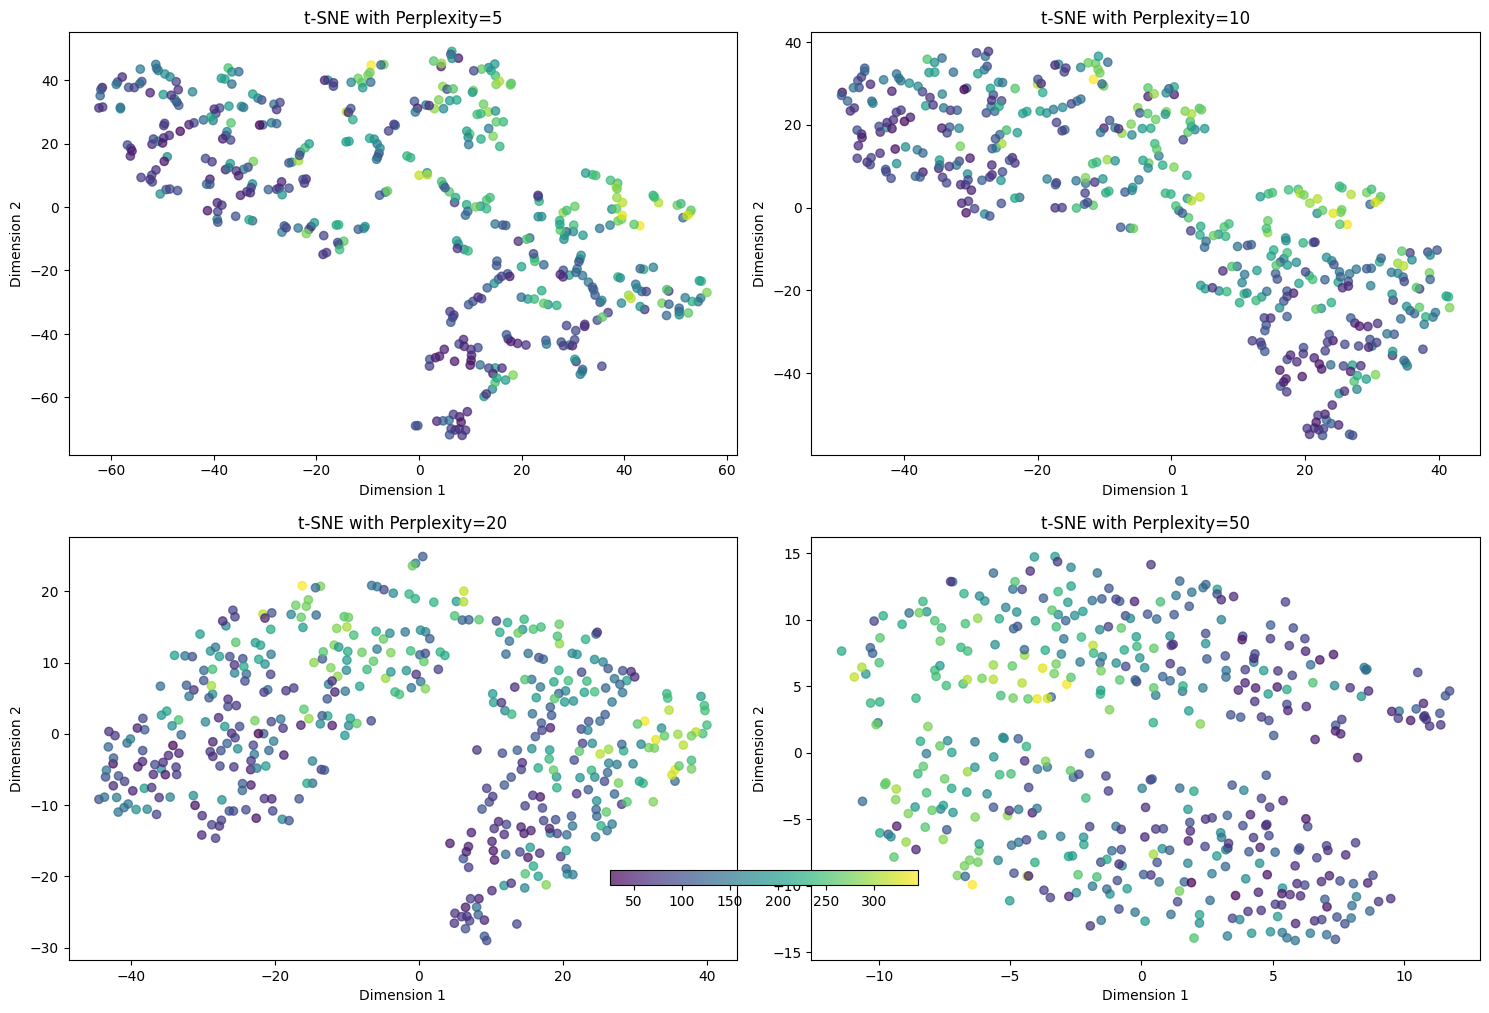

In [120]:
from sklearn.manifold import TSNE

perplexities = [5, 10, 20, 50]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    scatter = axs[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    axs[i].set_title(f't-SNE with Perplexity={perplexity}')
    axs[i].set_xlabel('Dimension 1')
    axs[i].set_ylabel('Dimension 2')


fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=0.02, pad=0.01)

plt.tight_layout()
plt.show()


## 10.b and 10.c

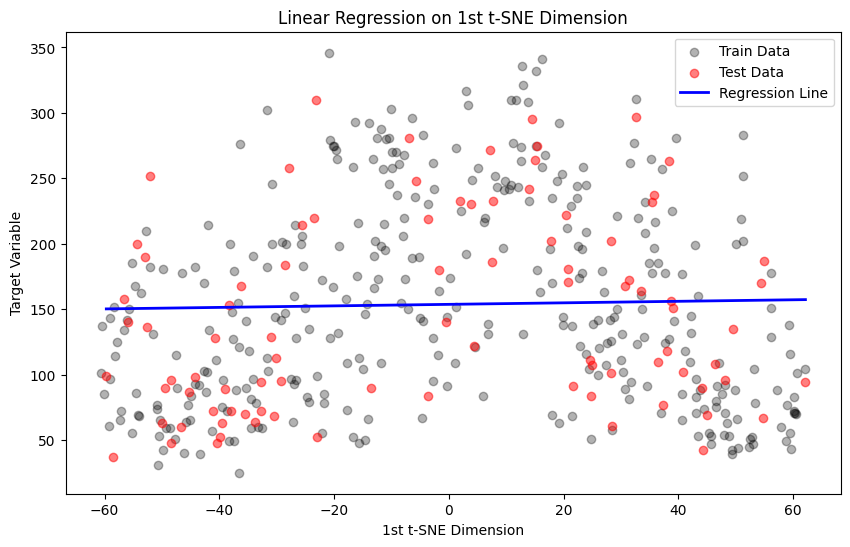

In [156]:
tsne_1d = TSNE(n_components=1, perplexity=10, random_state=42)
X_tsne_1d = tsne_1d.fit_transform(X_scaled)

X_train_1d, X_test_1d, y_train_1d, y_test_1d = train_test_split(X_tsne_1d, y, test_size=0.2, random_state=42)
model_1d = LinearRegression()
model_1d.fit(X_train_1d, y_train_1d)
y_pred_1d = model_1d.predict(X_test_1d)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_1d, y_train_1d, color='black', alpha=0.3, label='Train Data')
plt.scatter(X_test_1d, y_test_1d, color='red', alpha=0.5, label='Test Data')

sorted_indices = np.argsort(X_test_1d[:, 0])
plt.plot(X_test_1d[sorted_indices], y_pred_1d[sorted_indices], color='blue', linewidth=2, label='Regression Line')

plt.xlabel('1st t-SNE Dimension')
plt.ylabel('Target Variable')
plt.title('Linear Regression on 1st t-SNE Dimension')
plt.legend()
plt.show()


## 10.d and 10.e

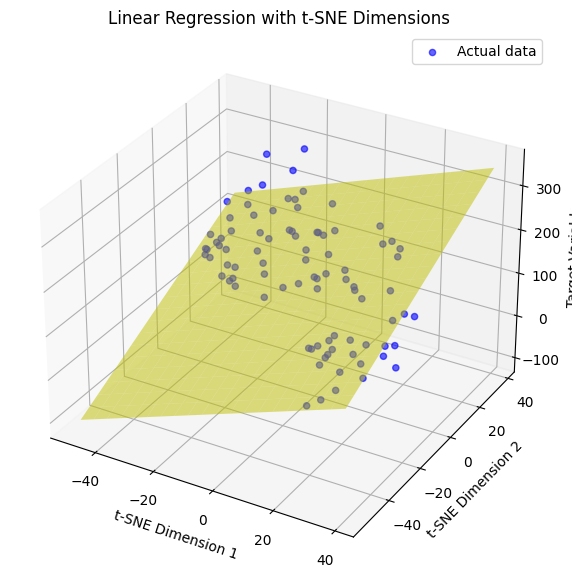

In [161]:
tsne_2d = TSNE(n_components=2, perplexity=10, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_tsne_2d, y, test_size=0.2, random_state=42)
model_2d = LinearRegression()
model_2d.fit(X_train_2d, y_train_2d)
y_pred_2d = model_2d.predict(X_test_2d)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d, color='b', alpha=0.6, label='Actual data')

x_grid_tsne_2d, y_grid_tsne_2d = np.meshgrid(np.linspace(X_test_2d[:, 0].min(), X_test_2d[:, 0].max(), 20),
                             np.linspace(X_test_2d[:, 1].min(), X_test_2d[:, 1].max(), 20))

grid_tsne_2d = np.c_[x_grid_tsne_2d.ravel(), y_grid_tsne_2d.ravel()]
z_pred = model_2d.predict(grid_tsne_2d).reshape(x_grid_tsne_2d.shape)

ax.plot_surface(x_grid_tsne_2d, y_grid_tsne_2d, z_pred, color='y', alpha=0.5)

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('Target Variable')
ax.set_title('Linear Regression with t-SNE Dimensions')
plt.legend()
plt.show()


## 10.f

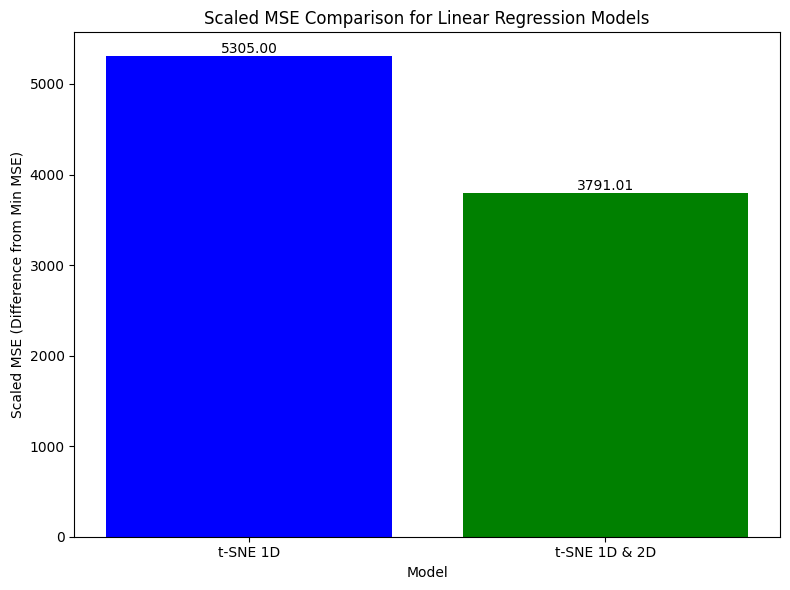

In [160]:
mse_1d_tsne = mean_squared_error(y_test_1d, y_pred_1d)

mse_2d_tsne = mean_squared_error(y_test_2d, y_pred_2d)

scaled_mse_values = [mse  for mse in [mse_1d_tsne, mse_2d_tsne]]
models = ['t-SNE 1D', 't-SNE 1D & 2D']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, scaled_mse_values, color=['blue', 'green'])

plt.title('Scaled MSE Comparison for Linear Regression Models')
plt.ylabel('Scaled MSE (Difference from Min MSE)')
plt.xlabel('Model')

# Annotating the MSE values on the bars
for bar, mse in zip(bars, [mse_1d_tsne, mse_2d_tsne]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 11.a

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

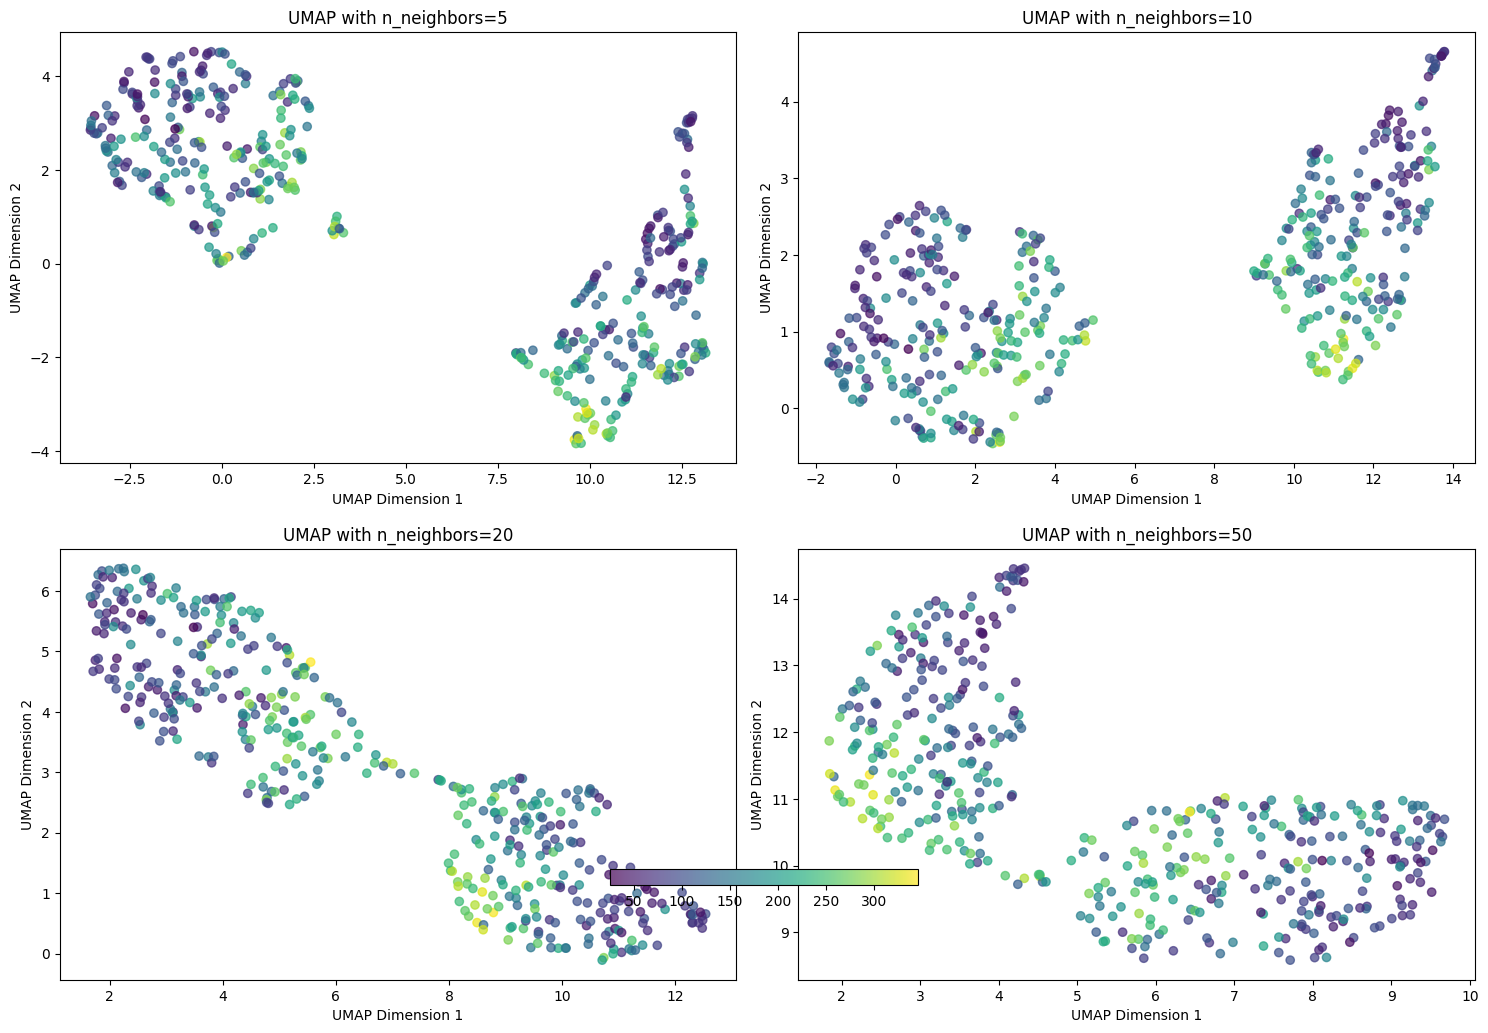

In [124]:
n_neighbors_values = [5, 10, 20, 50]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, n_neighbors in enumerate(n_neighbors_values):
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)

    scatter = axs[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
    axs[i].set_title(f'UMAP with n_neighbors={n_neighbors}')
    axs[i].set_xlabel('UMAP Dimension 1')
    axs[i].set_ylabel('UMAP Dimension 2')

fig.colorbar(scatter, ax=axs, orientation='horizontal', fraction=0.02, pad=0.05)

plt.tight_layout()
plt.show()


## 11.b and 11.c

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


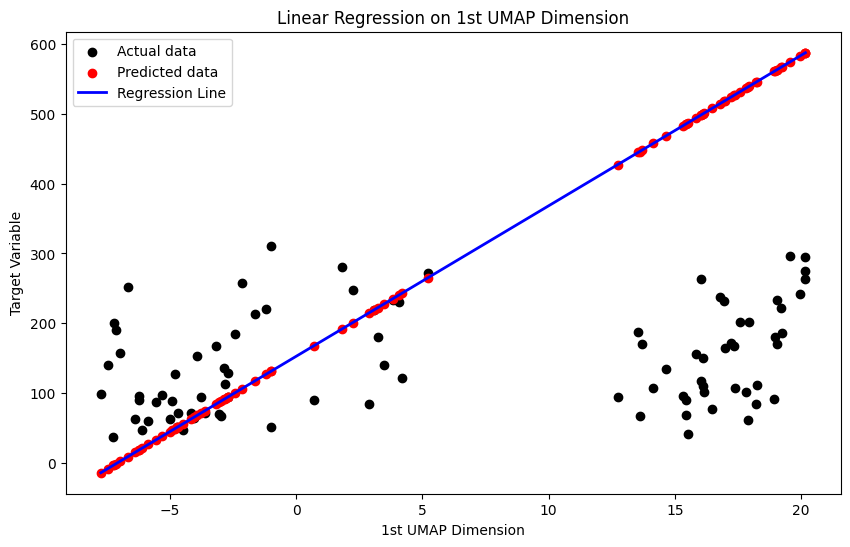

In [132]:
umap_reducer_1d = umap.UMAP(n_neighbors=10, n_components=1, random_state=42)
X_umap_1d = umap_reducer_1d.fit_transform(X_scaled)

X_train_1d, X_test_1d, y_train_1d, y_test_1d = train_test_split(X_umap_1d, y, test_size=0.2, random_state=42)

model_1d = LinearRegression()
model_1d.fit(X_train_1d, y_train_1d)

# Make predictions
y_pred_1d = model.predict(X_test_1d)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test_1d, y_test_1d, color='black', label='Actual data')
plt.scatter(X_test_1d, y_pred_1d, color='red', label='Predicted data')

# To plot the regression line, we need a range of x values and their corresponding predicted y values
x_range = np.linspace(X_test_1d.min(), X_test_1d.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(x_range)
plt.plot(x_range, y_range_pred, color='blue', linewidth=2, label='Regression Line')

plt.xlabel('1st UMAP Dimension')
plt.ylabel('Target Variable')
plt.title('Linear Regression on 1st UMAP Dimension')
plt.legend()
plt.show()


## 11.d and  11.e

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


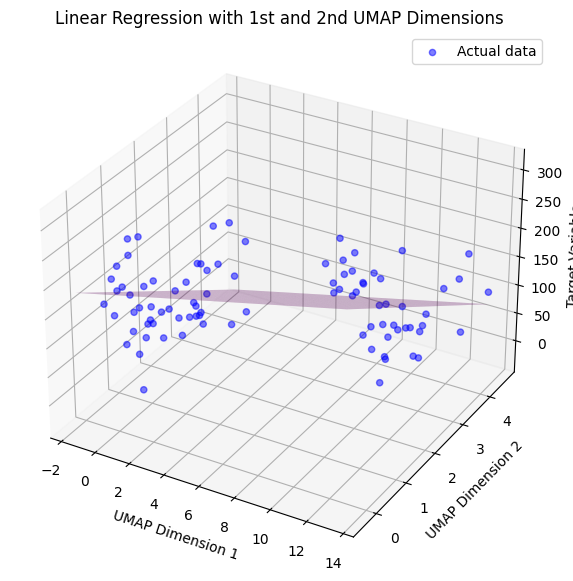

In [166]:
umap_reducer_2d = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap_2d = umap_reducer_2d.fit_transform(X_scaled)

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_umap_2d, y, test_size=0.2, random_state=42)

model_2d = LinearRegression()
model_2d.fit(X_train_2d, y_train_2d)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d, color='b', alpha=0.5, label='Actual data')

x_surf, y_surf = np.meshgrid(np.linspace(X_test_2d[:, 0].min(), X_test_2d[:, 0].max(), 50),
                             np.linspace(X_test_2d[:, 1].min(), X_test_2d[:, 1].max(), 50))

x_reshape = np.c_[x_surf.ravel(), y_surf.ravel()]
z_surf = model_2d.predict(x_reshape).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='m', alpha=0.3, edgecolor='none')

ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('Target Variable')
ax.set_title('Linear Regression with 1st and 2nd UMAP Dimensions')
plt.legend()
plt.show()


## 11.f

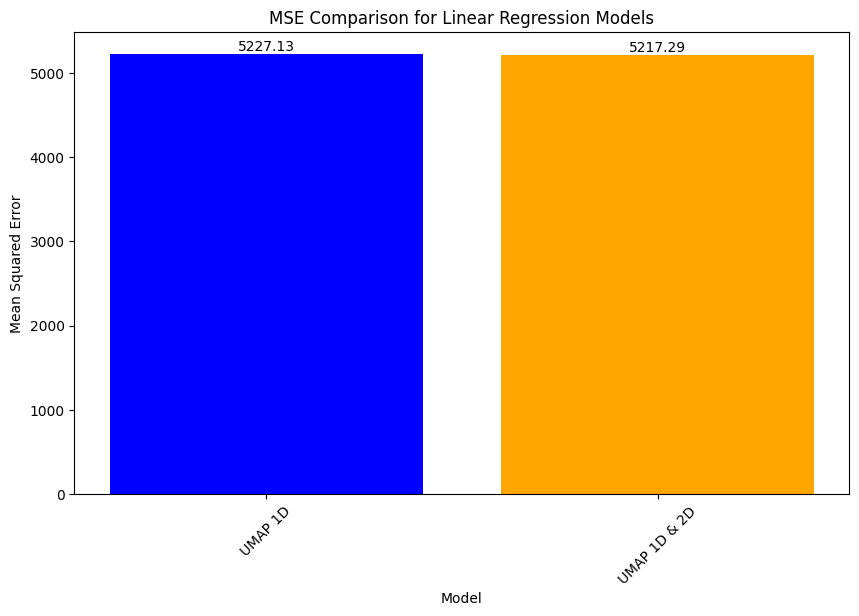

In [137]:
mse_values = [mse_1d, mse_2d]
models = ['UMAP 1D', 'UMAP 1D & 2D']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.title('MSE Comparison for Linear Regression Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
for i, mse in enumerate(mse_values):
    plt.text(i, mse, f'{mse:.2f}', ha='center', va='bottom')

plt.show()


## 11.g


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


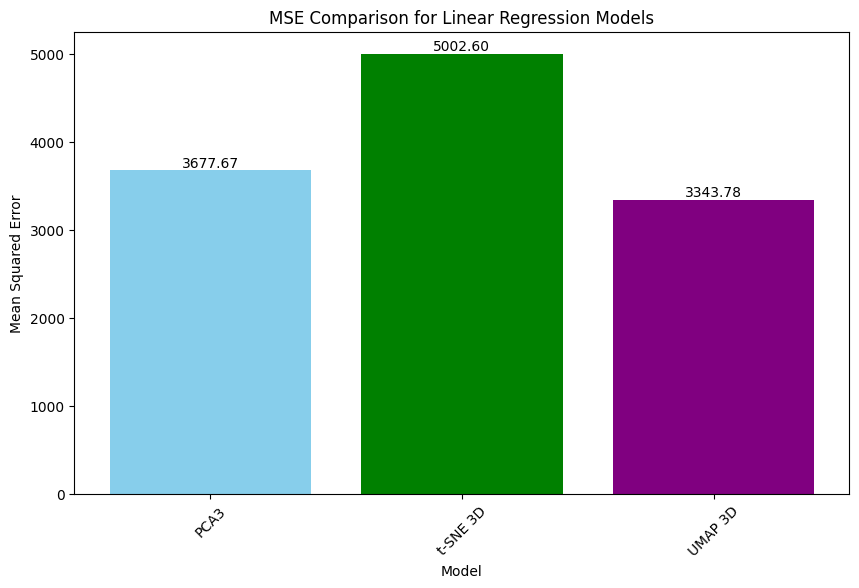

In [169]:
#PCA3
PCA3 = PCA(n_components=3)
X_PCA3 = PCA3.fit_transform(X_scaled)

X_train_PCA3, X_test_PCA3, y_train_PCA3, y_test_PCA3 = train_test_split(X_PCA3, y, test_size=0.2, random_state=42)

model_PCA3= LinearRegression()
model_PCA3.fit(X_train_PCA3, y_train_PCA3)

y_pred_PCA3 = model_PCA3.predict(X_test_PCA3)

mse_pc1_pc2_pc3 = mean_squared_error(y_test_PCA3, y_pred_PCA3)


#t-SNE 3D
tsne_3d = TSNE(n_components=3, perplexity=10, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

X_train_tsne3d, X_test_tsne3d, y_train_tsne3d, y_test_tsne3d = train_test_split(X_tsne_3d, y, test_size=0.2, random_state=42)
model_tsne3d = LinearRegression()
model_tsne3d.fit(X_train_tsne3d, y_train_tsne3d)
y_pred_tsne3d = model_tsne3d.predict(X_test_tsne3d)

mse_tSNE3= mean_squared_error(y_test_tsne3d, y_pred_tsne3d)



#UMAP 3D
umap_3d = umap.UMAP(n_neighbors=10, n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_scaled)

X_train_umap3d, X_test_umap3d, y_train_umap3d, y_test_umap3d = train_test_split(X_umap_3d, y, test_size=0.2, random_state=42)
model_umap3d = LinearRegression()
model_umap3d.fit(X_train_umap3d, y_train_umap3d)
y_pred_umap3d = model_umap3d.predict(X_test_umap3d)

mse_umap3= mean_squared_error(y_test_umap3d, y_pred_umap3d)

#PLOT
mse_values = [mse_pc1_pc2_pc3, mse_tSNE3, mse_umap3 ]
models = ['PCA3', 't-SNE 3D', 'UMAP 3D']

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['skyblue', 'green', 'purple'])
plt.title('MSE Comparison for Linear Regression Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
for i, mse in enumerate(mse_values):
    plt.text(i, mse, f'{mse:.2f}', ha='center', va='bottom')

plt.show()